In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [41]:
import pandas as pd
train = pd.read_csv('../data/processed_train.csv')
test = pd.read_csv('../data/processed_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27390 non-null  object
 1   sentiment  27390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.1+ KB


In [42]:
def tfidf_vectorizer(train, test):
    vec = TfidfVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text'])
    x_test = vec.transform(test['text'])
    return x_train, x_test

def bow_vectorizer(train, test):
    vec = CountVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text'])
    x_test = vec.transform(test['text'])
    return x_train, x_test

def binary_vectorizer(train, test):
    vec = CountVectorizer(binary=True, max_features=10000)
    x_train = vec.fit_transform(train['text'])
    x_test = vec.transform(test['text'])
    return x_train, x_test

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 750, 1000]
}

vectorizers = {
    "TF-IDF": tfidf_vectorizer,
    "Bag of Words": bow_vectorizer,
    "Binary": binary_vectorizer
}

In [44]:
for vec_name, vectorizer in vectorizers.items():
    print(f"\n==== {vec_name} ====")
    x_train, x_test = vectorizer(train, test)
    y_train = train['sentiment']
    y_test = test['sentiment']

    grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)
    grid.fit(x_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best CV f1-score:", grid.best_score_)

    # Đánh giá trên tập test
    y_pred = grid.predict(x_test)
    print("Classification report on test set:")
    print(classification_report(y_test, y_pred))


==== TF-IDF ====
Best params: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
Best CV f1-score: 0.684743797477282
Classification report on test set:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1000
           1       0.63      0.75      0.69      1418
           2       0.80      0.71      0.75      1103

    accuracy                           0.70      3521
   macro avg       0.72      0.70      0.70      3521
weighted avg       0.71      0.70      0.70      3521


==== Bag of Words ====
Best params: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
Best CV f1-score: 0.6882401215982844
Classification report on test set:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1000
           1       0.65      0.71      0.68      1418
           2       0.78      0.73      0.76      1103

    accuracy                           0.70      3521
   macro avg       0.71      0.70     

In [14]:
def model_eval(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [15]:
def run_logistic_regression(vectorizer_func, train, test, vectorizer_name):
    print(f"\n==== {vectorizer_name} Vectorization ====")
    x_train, x_test = vectorizer_func(train, test)
    y_train = train['sentiment']
    y_test = test['sentiment']
    model = LogisticRegression(max_iter=500)
    model_eval(model, x_train, y_train, x_test, y_test)


==== TF-IDF Vectorization ====
Accuracy Score: 0.7063
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1000
           1       0.64      0.75      0.69      1418
           2       0.81      0.71      0.76      1103

    accuracy                           0.71      3521
   macro avg       0.72      0.70      0.71      3521
weighted avg       0.72      0.71      0.71      3521

Confusion Matrix:


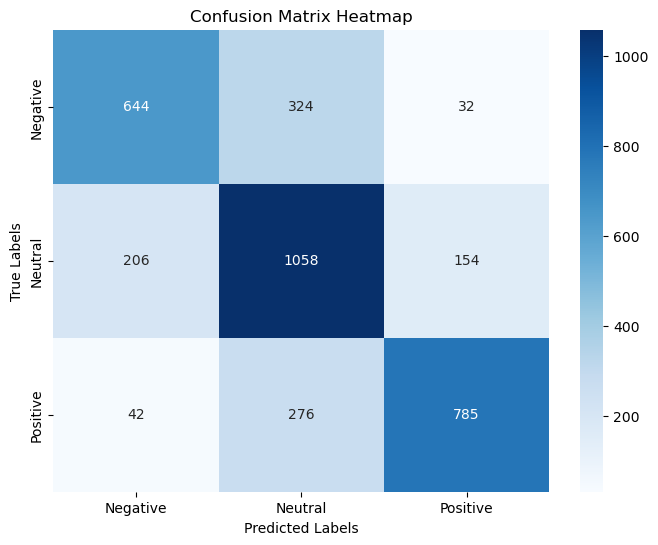


==== Bag of Words Vectorization ====
Accuracy Score: 0.6953
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1000
           1       0.64      0.71      0.67      1418
           2       0.78      0.71      0.75      1103

    accuracy                           0.70      3521
   macro avg       0.71      0.69      0.70      3521
weighted avg       0.70      0.70      0.70      3521

Confusion Matrix:


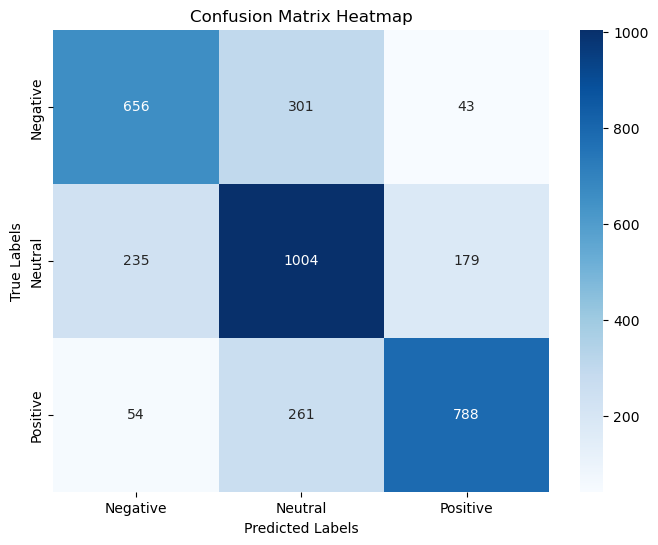


==== Binary Vectorization ====
Accuracy Score: 0.6989
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1000
           1       0.64      0.71      0.68      1418
           2       0.79      0.72      0.75      1103

    accuracy                           0.70      3521
   macro avg       0.71      0.70      0.70      3521
weighted avg       0.70      0.70      0.70      3521

Confusion Matrix:


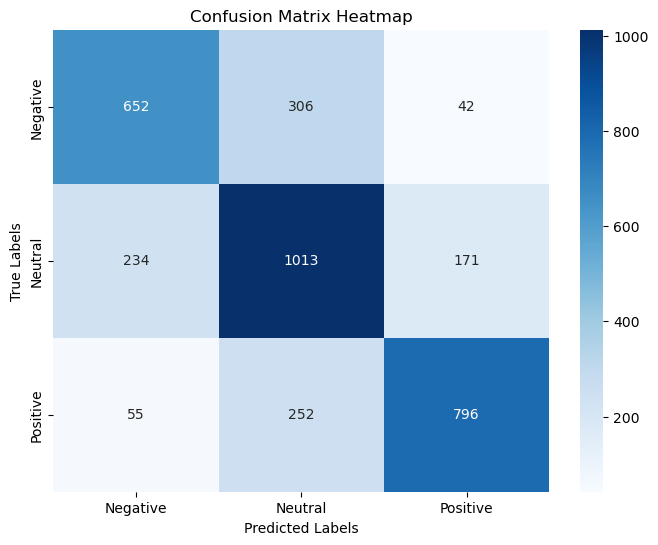

In [16]:
run_logistic_regression(tfidf_vectorizer, train, test, "TF-IDF")
run_logistic_regression(bow_vectorizer, train, test, "Bag of Words")
run_logistic_regression(binary_vectorizer, train, test, "Binary")